Lenear Regression 실습
* 집값에 대한 회귀모형
* X 변수가 여러 개인 Multiple Lenear Regression

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [5]:
#X 데이터와 y 데이터 분리
df = df.drop(['rental_id','neighborhood','borough'], axis=1)

X = df.drop(['rent'], axis=1)
y=df[['rent']]

X

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1
3535,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1
3536,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0
3537,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1


In [6]:
#train 데이터와 test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

모델 적합

In [7]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [9]:
my_apt = [[1,1,600,16,1,8,1,0,1,0,0,1,1,0]]
mlr.predict(my_apt)

C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2843.21472973]])

In [11]:
#예측값과 실제값 비교 (지도학습이고 실제값이 있으니까 비교해보는거)
y_pred= mlr.predict(X_test)

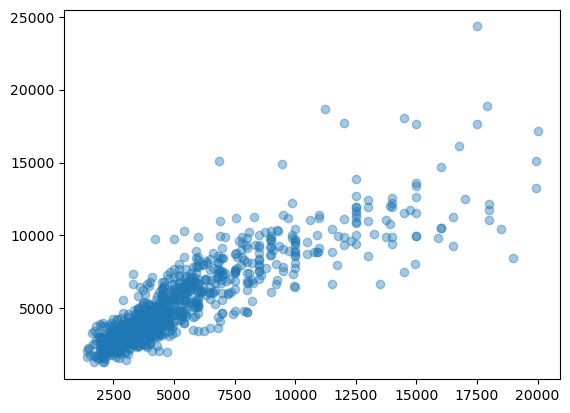

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.show()

회기계수

In [13]:
X.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

In [14]:
#X변수들에 대한 기울기
print(mlr.coef_)

[[-3.37442440e+02  1.14772852e+03  5.02185987e+00 -1.30836256e+01
   2.39856476e+01 -7.13826956e+00 -9.63291469e+01  6.83771666e-01
   8.75351951e+01 -8.53967304e+01  1.38431646e+02 -9.02201864e-01
  -2.17216255e+02 -1.65474531e+01]]


In [15]:
#y절편
print(mlr.intercept_)

[-510.81634984]


변수별 상관 확인
* EDA
* 결과를 보고 나서 EDA하기도 함

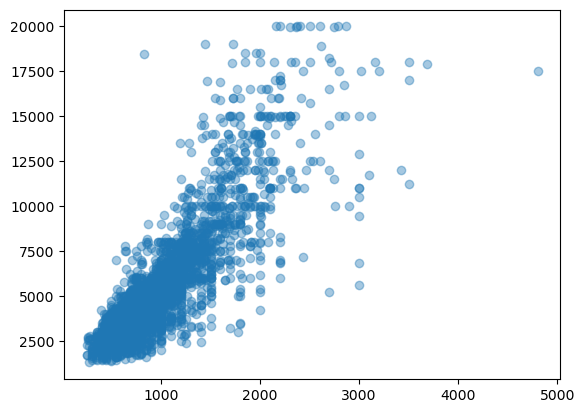

In [16]:
#집 넓이와 집값 간 상관관계
plt.scatter(df[['size_sqft']],df[['rent']], alpha = 0.4)
plt.show()

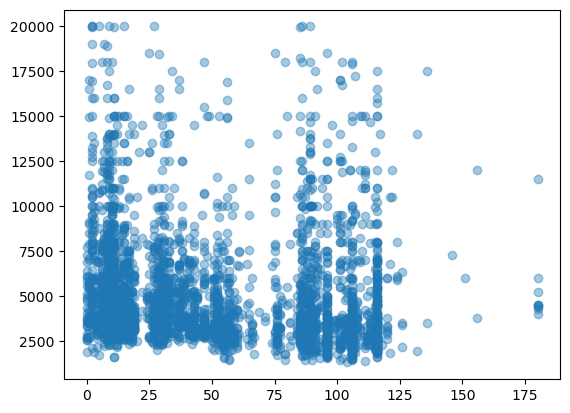

In [17]:
#연식과 집값 간 상관관계
plt.scatter(df[['building_age_yrs']],df[['rent']], alpha = 0.4)
plt.show()

뜻밖의 결과가 나오기도 함
* 상관계수값만으로는 파악 어려움
* 산점도를 그려보는 것이 바람직

# 성능평가
* 텍스트 요소 제외 14개 요소 적용

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [21]:
print("MAE : %.2f" %mae)
print("MSE : %.2f" %mse)
print("RMSE : %.2f" %rmse)
print("R2 : %.2f" %r2)

MAE : 951.32
MSE : 2271426.68
RMSE : 1507.13
R2 : 0.77
